# Nearest Neighbors

Nearest neighbor queries typically come in two flavors:
1. Find the `k` nearest neighbors to a point `x` in a data set `X`
2. Find all points within distance `r` from a point `x` in a data set `X`

There is an easy solution to both these problems, which is to do a brute-force computation

## Brute Force Solution

In [3]:
%pylab inline
import scipy as sp
import scipy.spatial
import scipy.spatial.distance as distance

Populating the interactive namespace from numpy and matplotlib


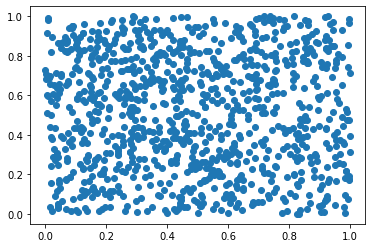

In [2]:
n = 1000
d = 2
X = np.random.rand(n,d)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [18]:
def knn(x, X, k, **kwargs):
    """
    find indices of k-nearest neighbors of x in X
    """
    d = distance.cdist(x.reshape(1,-1), X, **kwargs).flatten()
    return np.argpartition(d, k)[:k]

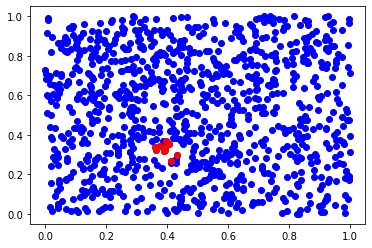

In [22]:
inds = knn(X[0], X, 10)
plt.scatter(X[:,0], X[:,1], c='b')
plt.scatter(X[inds,0], X[inds,1], c='r')
plt.show()

In [27]:
def rnn(x, X, r, **kwargs):
    """
    find r-nearest neighbors of x in X
    """
    d = distance.cdist(x.reshape(1,-1), X, **kwargs).flatten()
    return np.where(d<r)[0]

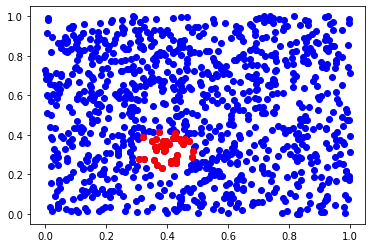

In [28]:
inds = rnn(X[0], X, 0.1)
plt.scatter(X[:,0], X[:,1], c='b')
plt.scatter(X[inds,0], X[inds,1], c='r')
plt.show()

## kd-trees

One of the issues with a brute force solution is that performing a nearest-neighbor query takes $O(n)$ time, where $n$ is the number of points in the data set.  This can become a big computational bottleneck for applications where many nearest neighbor queries are necessary (e.g. building a nearest neighbor graph), or speed is important (e.g. database retrieval)

A kd-tree, or k-dimensional tree is a data structure that can speed up nearest neighbor queries considerably.  They work by recursively partitioning $d$-dimensional data using hyperplanes.

`scipy.spatial` provides both [`KDTree`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html#scipy.spatial.KDTree) (native Python) and [`cKDTree`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.html#scipy.spatial.cKDTree) (C++)

In [29]:
tree = scipy.spatial.KDTree(X)

In [33]:
ds, inds =  tree.query(X[0], 10) # finds 10-th nearest neighbors

In [35]:
inds = tree.query_ball_point(X[0], 0.1) # finds neighbors in ball of radius 0.1

`cKDTrees` have the same methods

In [36]:
ctree = scipy.spatial.cKDTree(X)

In [38]:
ds, inds =  ctree.query(X[0], 10) # finds 10-th nearest neighbors

In [39]:
inds = tree.query_ball_point(X[0], 0.1) # finds neighbors in ball of radius 0.1

TODO: 

Use sklearn ball tree for ball trees (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html)

performance comparison

build and visualize a nearest neighbors graph